# **6 Ridge Regression and its friends (Ray)**
**6.1**

Generating a dataset with 100 samples and 5,000,000 features from the standard normal distribution.

In [7]:
import numpy as np

number_samples = 100
number_features = 5000000
random = np.random.RandomState(0)
# standard normal distribution
X = random.randn(number_samples, number_features)
y = random.randint(0, 2, number_samples)
print(X, y)

[[ 1.76405235  0.40015721  0.97873798 ...  0.20278002  0.70692825
   0.73150149]
 [ 1.10815238  0.58114489  0.56379333 ... -1.94471484 -0.34398521
  -0.74018953]
 [ 0.46344253 -1.1180354  -0.76683867 ...  0.53860166  0.66764152
   1.45348548]
 ...
 [ 0.76769925 -1.04373164 -1.28000534 ...  1.16667287  0.09858471
   1.28785553]
 [-0.04106887 -0.10516506 -0.49238676 ... -0.17747059 -0.6519088
  -0.87847762]
 [ 0.86166395  1.83102188  0.04444591 ... -0.30444054 -1.04768654
  -0.61859977]] [0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0]


Fitting Ridge regression and Kernel ridge regression.

In [8]:
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
import timeit

clf_ridge = Ridge(alpha=1)
clf_kernel_ridge = KernelRidge(alpha=1, kernel='linear')

Testing, if they work correctly. (All good)

In [9]:
clf_ridge.fit(X, y)
clf_kernel_ridge.fit(X, y)
print(clf_kernel_ridge.score(X, y))
print(clf_ridge.score(X, y))

0.9999999999999286
0.99999999999996


Comparing their running time. Kernel Ridge regression works 1.7 times faster than Ridge regression.

If we compare closed form solutions:

Kernel Ridge: $\bar \alpha^*=\bar{\bar X}^T(\bar{\bar K}+C\bar I)^{-1}\bar Y,$

Ridge: $\bar \alpha^*=\bar{\bar X}^T(\bar{\bar X}^T\bar{\bar X}+C\bar I)^{-1}\bar Y,$

we can see that the only difference is the kernel trick. And this trick allows us to compute the solution
cheaper and faster bu computing directly the kernel function ($n\times n$ matrix) instead of computationally intense
 $\bar{\bar X}^T\bar{\bar X}$ (product of $n\times p$ and $n\times p$ matrices). (Especially when the feature space is that large)

In [10]:
nCycles = 5
ridge_time = timeit.timeit('clf_ridge.fit(X, y)', number=nCycles,globals=globals())
kernel_time = timeit.timeit('clf_kernel_ridge.fit(X, y)', number=nCycles,globals=globals())
print(f'Total time (Ridge, Kernel Ridge): ({ridge_time},{kernel_time})')
print(f'Single cycle time (Ridge, Kernel Ridge):'
f' ({ridge_time/nCycles},{kernel_time/nCycles})')
print(f'Ratio: Ridge / Kernel Ridge: ({ridge_time/kernel_time})')


Total time (Ridge, Kernel Ridge): (18.445107300000004,10.77743070000001)
Single cycle time (Ridge, Kernel Ridge): (3.6890214600000006,2.155486140000002)
Ratio: Ridge / Kernel Ridge: (1.7114568224502698)


**6.2**

Generating a dataset with 1000 samples and 500 features from the standard normal distribution.

In [11]:
umber_samples = 1000
number_features = 5000
random = np.random.RandomState(1)
# standard normal distribution
X = random.randn(number_samples, number_features)
y = random.randint(0, 2, number_samples)
print(X, y)

[[ 1.62434536 -0.61175641 -0.52817175 ... -0.77598779  1.08488869
   2.24198946]
 [-0.92475528  1.1288899  -1.12879127 ... -1.01414382 -0.06269623
  -1.43786989]
 [-0.12247391  0.22816982 -0.35230513 ... -0.68579161  0.8902135
  -0.23745902]
 ...
 [-0.93864054 -0.91383489 -0.63225353 ... -0.82222062  0.50849524
   0.38605815]
 [ 0.56274641 -2.41577394  0.29772943 ...  1.8941172   1.22906414
  -0.96141702]
 [ 0.8960289  -2.43077732  0.59530281 ...  0.59084104 -1.67920461
   0.61766038]] [0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1
 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1]


Fitting Ridge regression and Lasso regression with moderate strength of
regularization ([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]). We can see, that with the correct value of $\alpha\le0.1$
we can achieve the same performance for both methods. However, Lasso regression achieve high performance
with much lower number of used features. For example, for alpha=0.1 lasso regression
 uses only 89 features (coefficient are 0 for all other features), while ridge regression uses all 5000.

We can see it more clearly on the plots below with the number of non-zero features vs regularization strength.

Thus, one lasso advantage is that it produces simpler (less features used) and easier to interpreter
classifiers. Lasso should performe better when some parameters is much more important that others.

In [27]:
from sklearn.linear_model import Lasso
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
for alpha in alphas:
    clf_ridge = Ridge(alpha=alpha, random_state=0, max_iter=4000)
    clf_lasso = Lasso(alpha=alpha, random_state=0, max_iter=4000)
    clf_ridge.fit(X, y)
    clf_lasso.fit(X, y)
    print(f'alpha={alpha}. Score ridge: {clf_ridge.score(X, y)}; Score lasso: {clf_lasso.score(X, y)}')
    coeff_ridge = np.array(clf_ridge.coef_)
    coeff_lasso = np.array(clf_lasso.coef_)
    print(f'number of useful features. ridge: {len(coeff_ridge[coeff_ridge != 0])};'
          f' lasso {len(coeff_lasso[coeff_lasso != 0])}')

alpha=1e-05. Score ridge: 1.0; Score lasso: 0.9999999938589469
number of useful features. ridge: 5000; lasso 313
alpha=0.0001. Score ridge: 0.9999999999999996; Score lasso: 0.9999993296674698
number of useful features. ridge: 5000; lasso 140
alpha=0.001. Score ridge: 0.9999999999999597; Score lasso: 0.9999315508590694
number of useful features. ridge: 5000; lasso 99
alpha=0.01. Score ridge: 0.9999999999959691; Score lasso: 0.9933272906841555
number of useful features. ridge: 5000; lasso 89
alpha=0.1. Score ridge: 0.9999999995969231; Score lasso: 0.48480394653244996
number of useful features. ridge: 5000; lasso 36
alpha=1. Score ridge: 0.9999999597074519; Score lasso: 0.0
number of useful features. ridge: 5000; lasso 0


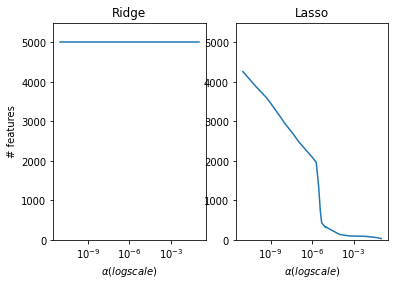

In [103]:
import matplotlib.pyplot as plt
alphas = np.array([1e-11, 1e-10, 5e-10, 1e-9, 5e-9, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6,
                   2e-6, 3e-6, 4e-6, 5e-6, 1e-5, 9e-6, 5e-5, 1e-4, 5e-4, 1e-3,
                   5e-3, 1e-2, 5e-2, 1e-1])
coeff_nz_ridge = []
coeff_nz_lasso = []
for alpha in alphas:
    clf_ridge = Ridge(alpha=alpha, random_state=0, max_iter=4000)
    clf_lasso = Lasso(alpha=alpha, random_state=0, max_iter=4000)
    clf_ridge.fit(X, y)
    clf_lasso.fit(X, y)
    # print(f'alpha={alpha}. Score ridge: {clf_ridge.score(X, y)}; Score lasso: {clf_lasso.score(X, y)}')
    coeff_ridge = np.array(clf_ridge.coef_)
    coeff_lasso = np.array(clf_lasso.coef_)
    coeff_nz_ridge.append(len(coeff_ridge[coeff_ridge != 0]))
    coeff_nz_lasso.append(len(coeff_lasso[coeff_lasso != 0]))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(alphas, coeff_nz_ridge)
ax2.plot(alphas, coeff_nz_lasso)
ax1.set_xscale('log')
ax1.set_ylim(0, 5500)
ax1.set_title('Ridge')
ax1.set_xlabel(r'$\alpha (log scale)$')
ax1.set_ylabel('# features')
ax2.set_xscale('log')
ax2.set_ylim(0, 5500)
ax2.set_title('Lasso')
ax2.set_xlabel(r'$\alpha (log scale)$')
plt.show()

**6.3**
Now let's plot regularization paths for lasso and ridge regressions.

For Lasso regression we plotting coefficients which are not 0. For ridge regression we are
plotting coefficients which are at least 10% of the highest amplitude (because otherwise there
are too many coefficients to plot).

Ranges of regularization strengths are different for these 2 algorithms. x-axis is log-scaled.
$1/\alpha$ is used.

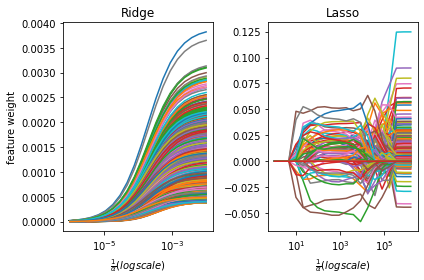

In [102]:
import matplotlib.pyplot as plt
alphas_ridge = 10 ** (np.linspace(6, 2, 20))
alphas_lasso = 10 ** (np.linspace(0, -6.2, 20))
coeff_ridge_ar = []
coeff_lasso_ar = []
for alpha_ridge, alpha_lasso in zip(alphas_ridge, alphas_lasso):
    clf_ridge = Ridge(alpha=alpha_ridge, random_state=0, max_iter=4000)
    clf_lasso = Lasso(alpha=alpha_lasso, random_state=0, max_iter=4000)
    clf_ridge.fit(X, y)
    clf_lasso.fit(X, y)
    coeff_ridge = np.array(clf_ridge.coef_)
    coeff_lasso = np.array(clf_lasso.coef_)
    coeff_ridge_ar.append(coeff_ridge)
    coeff_lasso_ar.append(coeff_lasso)
fig, (ax1, ax2) = plt.subplots(1, 2)
coeff_ridge_ar = np.array(coeff_ridge_ar)
coeff_lasso_ar = np.array(coeff_lasso_ar)
coeff_ridge_max = coeff_ridge_ar.max()
coeff_lasso_max = coeff_lasso_ar.max()
value_max = 0.1
for coeff in coeff_ridge_ar.T:
    if coeff.max() > value_max * coeff_ridge_max:
        ax1.plot(1/alphas_ridge, coeff)
for coeff in coeff_lasso_ar.T:
    if coeff.max() != 0:
        ax2.plot(1/alphas_lasso, coeff)
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_title('Ridge')
ax1.set_xlabel(r'$\frac{1}{\alpha} (log scale)$')
ax1.set_ylabel('feature weight')
ax2.set_xscale('log')
ax2.set_title('Lasso')
ax2.set_xlabel(r'$\frac{1}{\alpha} (log scale)$')
plt.tight_layout()
plt.show()
